# Plotting the results

In [1]:
import numpy as np
import matplotlib.pyplot as plt 

In [2]:
all_data = np.loadtxt('../momentum_dependencetpe218pwanew.dat')
all_data = np.transpose(all_data)

full_av18 = np.loadtxt('../av18_momentum_dependence.dat')
full_av18 = np.transpose(full_av18)

momentum = all_data[0]
momentum_av18 = full_av18[0]

V14a_central = all_data[1]
V14a_lower = all_data[1] - all_data[2]
V14a_upper = all_data[1] + all_data[2]

V14b_central = all_data[3]
V14b_lower = all_data[3] - all_data[4]
V14b_upper = all_data[3] + all_data[4]

av14a = full_av18[19]
av14b = full_av18[20]

In [3]:
def plot_filled_band(x,central,lower,upper,x2,av18,xlabel,ylabel,fname):
    plt.fill_between(x,lower,upper, label=r'delta-shell $\chi$TPE')
    plt.plot(x,central)
    plt.plot(x2,av18,label=r'AV18')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend()
    plt.autoscale(enable=True, axis='x', tight=True)
    plt.savefig(fname,format='pdf',bbox_inches='tight',transparent=True)
    plt.show()

In [4]:
params = {'text.usetex': False, 'mathtext.fontset':'stixsans','font.size': 16,'axes.linewidth':1}
plt.rcParams.update(params)

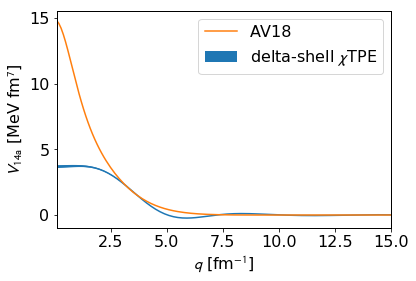

In [5]:
xlabel = r'$q$ [fm$^{-1}$]'
ylabel = r'$V_{\rm 14a}$ [MeV fm$^{7}$]'
file_name = 'v_momemtum_14a.pdf'
plot_filled_band(momentum,V14a_central,V14a_lower,V14a_upper,momentum_av18,av14a,xlabel,ylabel,file_name)

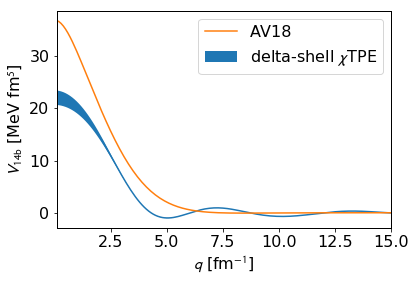

In [6]:
xlabel = r'$q$ [fm$^{-1}$]'
ylabel = r'$V_{\rm 14b}$ [MeV fm$^{5}$]'
file_name = 'v_momemtum_14b.pdf'
plot_filled_band(momentum,V14b_central,V14b_lower,V14b_upper,momentum_av18,av14b,xlabel,ylabel,file_name)